<a href="https://colab.research.google.com/github/Sachin-D-N/Amazon_Food_Reviews/blob/main/04.Gradient_Descent/Implementation_of_Stochastic_Gradient_Descent_for_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# SGD Regressor from scratch :
Objective :

1. Take the boston data set from sklearn.
2. Write the SGDRegressor from scratch.
3. You don’t need to split the data into train and test, you consider whole data for this implementation.
4. Get weights( coefs_ and intercept ) from your model and the MSE value.
5. Don’t forget to standardize the data, and choose appropriate learning rate.
6. Train your model using SGDRegressor with the same parameters, and find the MSE on the same data.
7. Compare these two results.
8. You can choose any other metric other than MSE to compare them. They both should be same.


In [ ]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing the boston data set from sklearn¶

In [ ]:
# load the boston data
boston = load_boston()
data = boston.data    
boston_data = pd.DataFrame(data)

In [ ]:
boston_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# defining dependent and Independent Variables
X = boston_data
Y = boston.target

In [ ]:
# Standardize the data the whole data i.e in X
scaler = StandardScaler()
standardized_X = scaler.fit_transform(X)

# SGDRegressor for Linear Regression using sklearn i.e using Library

In [ ]:
from sklearn import linear_model

model = linear_model.SGDRegressor()
model.fit(standardized_X,Y)

Y_pred = model.predict(standardized_X)

# Optimal Weights and Intercept using sklearn SGD

In [ ]:
from numpy import c_
print('Optimal Weights for sklearn SGD:\n')
print(c_[model.coef_])

print('\nIntercept for sklearn SGD:',model.intercept_)

Optimal Weights for sklearn SGD:

[[-0.87503664]
 [ 1.00878606]
 [-0.04510195]
 [ 0.69002499]
 [-1.97467587]
 [ 2.7107214 ]
 [-0.00624996]
 [-3.09515111]
 [ 2.18143532]
 [-1.52397793]
 [-2.02855591]
 [ 0.83880748]
 [-3.72081858]]

Intercept for sklearn SGD: [22.52937732]


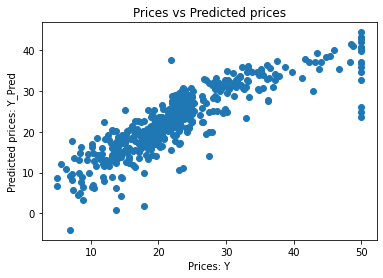

In [ ]:
# visualizing the results
import matplotlib.pyplot as plt
plt.scatter(Y, Y_pred)
plt.xlabel("Prices: Y")
plt.ylabel("Predicted prices: Y_Pred")
plt.title("Prices vs Predicted prices")
plt.show()

Text(0.5, 1.0, 'Error plot for sklearn SGD')

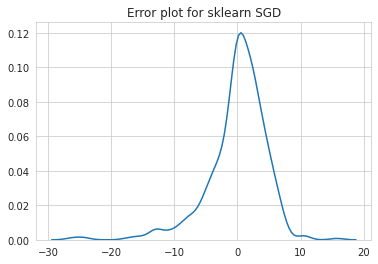

In [ ]:
# plotting Error
sns.set_style('whitegrid')
sns.kdeplot((Y_pred-Y))
plt.title("Error plot for sklearn SGD")

In [ ]:
#computing Mean Square Error
MSE_sklearn = mean_squared_error(Y, Y_pred)
print("MSE for SGD Sklearn ",MSE_sklearn)

MSE for SGD Sklearn  21.93746668720657


# SGDRegressor for Linear Regression from Scratch

In [ ]:
# SGDRegressor for linear regression from scratch which compututes optimal w and MSE 
def SGD_fun(X,y,weight,learning_rate=0.01,iterations=10):
    """Fun to compute the optimal weight and intercept"""
    m = len(y) #  length of the data set
    
    for i in range(iterations): # iteration 
        sum_error = 0
        
        for j in range(m):
            batch_size = np.random.randint(0,m)  # random batch size for every iteration i.e k batch_size 
            X_i = X[batch_size,:].reshape(1,X.shape[1])
            y_i = y[batch_size].reshape(1,1)
            prediction = np.dot(X_i,weight)
            
            #-------- error ---------
            error = prediction - y_i 
            sum_error += error**2
            #--------- error ---------
            
            weight = weight -(2/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
        
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (i, learning_rate, sum_error/m))
                
    return weight

In [ ]:
def predict_fun(X_b,weight):
    """Fun to predict y using data x and weight"""
    y_pred = X_b.dot(weight)
    y_pred = y_pred.ravel()
    return y_pred

In [ ]:
learning_rate =0.2 #learning_rate
n_iter = 100 #no. of iterations

weight = np.random.randn(14,1) #picking the initial random weight and intercept  

X_train = np.c_[np.ones((len(standardized_X),1)),standardized_X] 

In [ ]:
optimal_weight = SGD_fun(X_train,Y,weight,learning_rate,n_iter)

>epoch=0, lrate=0.200, error=463.562
>epoch=1, lrate=0.200, error=246.452
>epoch=2, lrate=0.200, error=99.013
>epoch=3, lrate=0.200, error=69.866
>epoch=4, lrate=0.200, error=37.899
>epoch=5, lrate=0.200, error=40.021
>epoch=6, lrate=0.200, error=27.938
>epoch=7, lrate=0.200, error=27.374
>epoch=8, lrate=0.200, error=22.631
>epoch=9, lrate=0.200, error=24.277
>epoch=10, lrate=0.200, error=15.635
>epoch=11, lrate=0.200, error=29.714
>epoch=12, lrate=0.200, error=21.680
>epoch=13, lrate=0.200, error=17.746
>epoch=14, lrate=0.200, error=26.466
>epoch=15, lrate=0.200, error=23.030
>epoch=16, lrate=0.200, error=20.785
>epoch=17, lrate=0.200, error=16.121
>epoch=18, lrate=0.200, error=20.950
>epoch=19, lrate=0.200, error=18.972
>epoch=20, lrate=0.200, error=19.598
>epoch=21, lrate=0.200, error=23.488
>epoch=22, lrate=0.200, error=27.867
>epoch=23, lrate=0.200, error=21.380
>epoch=24, lrate=0.200, error=25.793
>epoch=25, lrate=0.200, error=20.890
>epoch=26, lrate=0.200, error=18.780
>epoch=27

# Optimal Weights and Intercept without using sklearn SGD

In [ ]:
print('Optimal Weights without using Sklearn SGD:\n')
print(optimal_weight[1:])

print('\nIntercept without using Sklearn SGD:  {:f}'.format(optimal_weight[0][0]))

Optimal Weights without using Sklearn SGD:

[[-0.96596902]
 [ 1.11421404]
 [ 0.04323777]
 [ 0.89447038]
 [-2.02793857]
 [ 2.56795752]
 [-0.00750362]
 [-3.05554055]
 [ 2.25290304]
 [-1.90334442]
 [-1.97749233]
 [ 0.83628909]
 [-3.87557471]]

Intercept without using Sklearn SGD:  22.517075


# Getting Predicted Y using optimal weight for data set X_train

In [ ]:
y_predicted = predict_fun(X_train,optimal_weight)

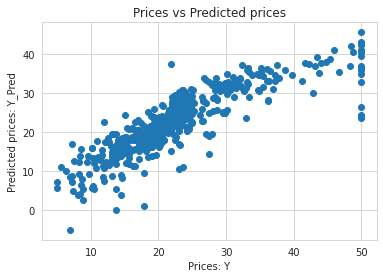

In [ ]:
# visualizing the results
import matplotlib.pyplot as plt
plt.scatter(Y, y_predicted)
plt.xlabel("Prices: Y")
plt.ylabel("Predicted prices: Y_Pred")
plt.title("Prices vs Predicted prices")
plt.show()

Text(0.5, 1.0, 'Error plot for sklearn SGD')

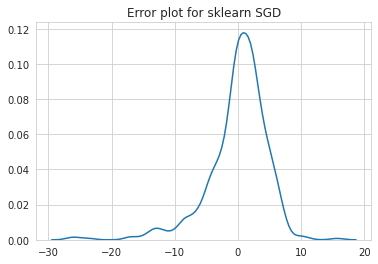

In [ ]:
# plotting Error
sns.set_style('whitegrid')
sns.kdeplot((y_predicted-Y))
plt.title("Error plot for sklearn SGD")

In [ ]:
#computing Mean Square Error
MSE_sklearn = mean_squared_error(Y, y_predicted)
print("MSE for SGD Sklearn ",MSE_sklearn)

MSE for SGD Sklearn  22.093600253378703


Comparing Sklearn SGD and Self Implemented SGD

Text(0.5, 1.0, 'Error plot for Sklearn SGD and Self Implemented SGD')

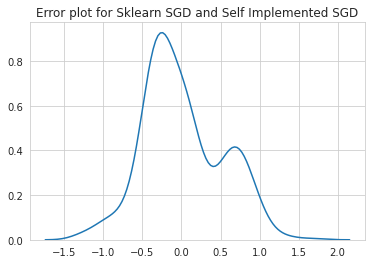

In [ ]:
sklearn_pred = Y_pred 
self_pred = y_predicted
sns.set_style('whitegrid')
sns.kdeplot((sklearn_pred-self_pred))
plt.title("Error plot for Sklearn SGD and Self Implemented SGD")

In [ ]:
#comparision of Both models weights

print("Sklearn SGD optimal Weight")
print(c_[model.coef_])
print("\n Self implemented SGD optimal Weight")
print(optimal_weight[1:])

Sklearn SGD optimal Weight
[[-0.87503664]
 [ 1.00878606]
 [-0.04510195]
 [ 0.69002499]
 [-1.97467587]
 [ 2.7107214 ]
 [-0.00624996]
 [-3.09515111]
 [ 2.18143532]
 [-1.52397793]
 [-2.02855591]
 [ 0.83880748]
 [-3.72081858]]

 Self implemented SGD optimal Weight
[[-0.96596902]
 [ 1.11421404]
 [ 0.04323777]
 [ 0.89447038]
 [-2.02793857]
 [ 2.56795752]
 [-0.00750362]
 [-3.05554055]
 [ 2.25290304]
 [-1.90334442]
 [-1.97749233]
 [ 0.83628909]
 [-3.87557471]]


In [ ]:
# Intercept for both models
print("Sklearn SGD optimal intercept",model.intercept_)
print("\nSelf implemented SGD optimal intercept",optimal_weight[0][0])

Sklearn SGD optimal intercept [22.52937732]

Self implemented SGD optimal intercept 22.517075262675274


# Conclusion
As from above plot we can see that mean of the differences in the prediction of the two models  is at 0
As we can see above intercept and weight(coef) is almost same for sklearn SGD and self implemented sgd


In [ ]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["SGD","MSE"]

x.add_row(["Sklearn",22.879567149030688])
x.add_row(["without Sklearn",22.0562556620678])

print(x)

+-----------------+--------------------+
|       SGD       |        MSE         |
+-----------------+--------------------+
|     Sklearn     | 22.879567149030688 |
| without Sklearn |  22.0562556620678  |
+-----------------+--------------------+
